### TensorFlow Tutorial with the Boston Housing Dataset

This tutorial was taken from TensorFlow documentation website to learn the workings of the library. This example focuses on using Multi-Layer Perceptron Deep Learning model to predict the housing prices in Boston during the 1970s.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.9.0-rc2


In [2]:
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

65536/57026 [==================================] - 0s 2us/step


In [5]:
#shuffles the dataset
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [6]:
print('Training Set: {}'.format(len(train_data)))
print('Testing SetL {}'.format(len(test_data)))

Training Set: 404
Testing SetL 102


In [8]:
print(train_data[0])

[6.44405e+00 0.00000e+00 1.81000e+01 0.00000e+00 5.84000e-01 6.42500e+00
 7.48000e+01 2.20040e+00 2.40000e+01 6.66000e+02 2.02000e+01 9.79500e+01
 1.20300e+01]


In [9]:
import pandas as pd
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns = columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,6.44405,0.0,18.10,0.0,0.584,6.425,74.8,2.2004,24.0,666.0,20.2,97.95,12.03
1,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
2,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
3,0.46296,0.0,6.20,0.0,0.504,7.412,76.9,3.6715,8.0,307.0,17.4,376.14,5.25
4,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18


In [10]:
#labels are the housing prices in thousands of dollars
print(train_labels[0:10])

[16.1 21.8 18.2 31.7 23.9 50.  16.4 30.5 50.  20. ]


In [12]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[ 0.29243194 -0.48361547  1.0283258  -0.25683275  0.2274396   0.22276258
  0.20745873 -0.75941728  1.67588577  1.5652875   0.78447637 -2.73242467
 -0.09810377]


In [16]:
#wrap the NN within a function since the tutorial will require to create another model
def build_model():
  
  #declaring the model
  model = keras.Sequential()
  model.add(tf.keras.layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
  model.add(tf.keras.layers.Dense(64, activation = 'relu'))
  model.add(tf.keras.layers.Dense(1))
  
  optimizer = tf.train.RMSPropOptimizer(0.001)
  #compiling the model
  model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])
  
  return model

model = build_model()

model.summary()
  
  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [21]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0:
      print('')
    print('.')

EPOCHS = 500

In [23]:
model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 65us/step - loss: 1.5544 - mean_absolute_error: 0.9335 - val_loss: 17.8999 - val_mean_absolute_error: 2.7828
Epoch 2/500
323/323 [==============================] - 0s 38us/step - loss: 1.3175 - mean_absolute_error: 0.8309 - val_loss: 17.2613 - val_mean_absolute_error: 2.6458
Epoch 3/500
323/323 [==============================] - 0s 41us/step - loss: 1.4560 - mean_absolute_error: 0.8757 - val_loss: 16.3480 - val_mean_absolute_error: 2.4885
Epoch 4/500
323/323 [==============================] - 0s 42us/step - loss: 1.4271 - mean_absolute_error: 0.8621 - val_loss: 18.7829 - val_mean_absolute_error: 2.8809
Epoch 5/500
323/323 [==============================] - 0s 37us/step - loss: 1.3768 - mean_absolute_error: 0.8243 - val_loss: 17.1674 - val_mean_absolute_error: 2.6131
Epoch 6/500
323/323 [==============================] - 0s 40us/step - loss: 1.4357 - mean_absolute_error: 0.8602 - val_l

Epoch 68/500
323/323 [==============================] - 0s 52us/step - loss: 1.3539 - mean_absolute_error: 0.8327 - val_loss: 16.4660 - val_mean_absolute_error: 2.4958
Epoch 69/500
323/323 [==============================] - 0s 42us/step - loss: 1.2983 - mean_absolute_error: 0.8235 - val_loss: 16.7044 - val_mean_absolute_error: 2.5134
Epoch 70/500
323/323 [==============================] - 0s 48us/step - loss: 1.2792 - mean_absolute_error: 0.7995 - val_loss: 17.0630 - val_mean_absolute_error: 2.6580
Epoch 71/500
323/323 [==============================] - 0s 58us/step - loss: 1.1957 - mean_absolute_error: 0.7687 - val_loss: 20.0782 - val_mean_absolute_error: 3.0664
Epoch 72/500
323/323 [==============================] - 0s 53us/step - loss: 1.3382 - mean_absolute_error: 0.8188 - val_loss: 17.0012 - val_mean_absolute_error: 2.6440
Epoch 73/500
323/323 [==============================] - 0s 68us/step - loss: 1.2479 - mean_absolute_error: 0.7860 - val_loss: 16.7542 - val_mean_absolute_error:

 32/323 [=>............................] - ETA: 0s - loss: 1.5200 - mean_absolute_error: 0.9006323/323 [==============================] - 0s 67us/step - loss: 1.0815 - mean_absolute_error: 0.7438 - val_loss: 16.7349 - val_mean_absolute_error: 2.6115
Epoch 136/500
323/323 [==============================] - 0s 58us/step - loss: 1.1462 - mean_absolute_error: 0.7772 - val_loss: 17.1998 - val_mean_absolute_error: 2.6605
Epoch 137/500
323/323 [==============================] - 0s 86us/step - loss: 1.1246 - mean_absolute_error: 0.7583 - val_loss: 20.1385 - val_mean_absolute_error: 3.1077
Epoch 138/500
323/323 [==============================] - 0s 63us/step - loss: 1.3327 - mean_absolute_error: 0.8173 - val_loss: 17.7457 - val_mean_absolute_error: 2.8144
Epoch 139/500
323/323 [==============================] - 0s 61us/step - loss: 1.2280 - mean_absolute_error: 0.7435 - val_loss: 17.0894 - val_mean_absolute_error: 2.6381
Epoch 140/500
323/323 [==============================] - 0s 58us/step - lo

 32/323 [=>............................] - ETA: 0s - loss: 0.7267 - mean_absolute_error: 0.5684323/323 [==============================] - 0s 90us/step - loss: 1.0445 - mean_absolute_error: 0.6938 - val_loss: 17.3810 - val_mean_absolute_error: 2.7242
Epoch 203/500
323/323 [==============================] - 0s 60us/step - loss: 1.0527 - mean_absolute_error: 0.7261 - val_loss: 17.3178 - val_mean_absolute_error: 2.7097
Epoch 204/500
323/323 [==============================] - 0s 65us/step - loss: 0.9657 - mean_absolute_error: 0.6721 - val_loss: 18.0772 - val_mean_absolute_error: 2.8187
Epoch 205/500
323/323 [==============================] - 0s 63us/step - loss: 1.1661 - mean_absolute_error: 0.7569 - val_loss: 16.6185 - val_mean_absolute_error: 2.6346
Epoch 206/500
323/323 [==============================] - 0s 60us/step - loss: 0.8985 - mean_absolute_error: 0.6801 - val_loss: 18.0960 - val_mean_absolute_error: 2.7150
Epoch 207/500
323/323 [==============================] - 0s 59us/step - lo

323/323 [==============================] - 0s 76us/step - loss: 1.0946 - mean_absolute_error: 0.7221 - val_loss: 18.3055 - val_mean_absolute_error: 2.9025
Epoch 267/500
323/323 [==============================] - 0s 57us/step - loss: 1.0280 - mean_absolute_error: 0.7165 - val_loss: 16.5229 - val_mean_absolute_error: 2.6458
Epoch 268/500
323/323 [==============================] - 0s 53us/step - loss: 0.8800 - mean_absolute_error: 0.6612 - val_loss: 19.6251 - val_mean_absolute_error: 3.0389
Epoch 269/500
323/323 [==============================] - 0s 97us/step - loss: 0.8794 - mean_absolute_error: 0.6572 - val_loss: 18.7906 - val_mean_absolute_error: 2.9129
Epoch 270/500
323/323 [==============================] - 0s 67us/step - loss: 0.9460 - mean_absolute_error: 0.7036 - val_loss: 17.4471 - val_mean_absolute_error: 2.7599
Epoch 271/500
323/323 [==============================] - 0s 65us/step - loss: 1.0778 - mean_absolute_error: 0.7553 - val_loss: 18.2776 - val_mean_absolute_error: 2.9049


Epoch 333/500
323/323 [==============================] - 0s 70us/step - loss: 0.8434 - mean_absolute_error: 0.6501 - val_loss: 18.0893 - val_mean_absolute_error: 2.8705
Epoch 334/500
323/323 [==============================] - 0s 55us/step - loss: 0.8783 - mean_absolute_error: 0.6628 - val_loss: 17.3494 - val_mean_absolute_error: 2.7591
Epoch 335/500
323/323 [==============================] - 0s 52us/step - loss: 0.7673 - mean_absolute_error: 0.6251 - val_loss: 17.5963 - val_mean_absolute_error: 2.7664
Epoch 336/500
323/323 [==============================] - 0s 64us/step - loss: 0.8852 - mean_absolute_error: 0.6724 - val_loss: 19.1790 - val_mean_absolute_error: 3.0421
Epoch 337/500
323/323 [==============================] - 0s 62us/step - loss: 0.9603 - mean_absolute_error: 0.6790 - val_loss: 16.8522 - val_mean_absolute_error: 2.6905
Epoch 338/500
323/323 [==============================] - 0s 80us/step - loss: 0.8005 - mean_absolute_error: 0.6150 - val_loss: 16.8918 - val_mean_absolute_

323/323 [==============================] - 0s 59us/step - loss: 0.9047 - mean_absolute_error: 0.6581 - val_loss: 17.4504 - val_mean_absolute_error: 2.7994
Epoch 402/500
323/323 [==============================] - 0s 66us/step - loss: 0.7025 - mean_absolute_error: 0.5823 - val_loss: 17.9400 - val_mean_absolute_error: 2.8239
Epoch 403/500
323/323 [==============================] - 0s 52us/step - loss: 0.7336 - mean_absolute_error: 0.6156 - val_loss: 16.6551 - val_mean_absolute_error: 2.7136
Epoch 404/500
323/323 [==============================] - 0s 63us/step - loss: 0.8312 - mean_absolute_error: 0.6613 - val_loss: 17.7401 - val_mean_absolute_error: 2.8347
Epoch 405/500
323/323 [==============================] - 0s 67us/step - loss: 0.8736 - mean_absolute_error: 0.6545 - val_loss: 17.2480 - val_mean_absolute_error: 2.7813
Epoch 406/500
323/323 [==============================] - 0s 59us/step - loss: 0.8278 - mean_absolute_error: 0.6544 - val_loss: 16.8391 - val_mean_absolute_error: 2.6671


 32/323 [=>............................] - ETA: 0s - loss: 0.3861 - mean_absolute_error: 0.4118323/323 [==============================] - 0s 61us/step - loss: 0.6815 - mean_absolute_error: 0.5490 - val_loss: 16.9106 - val_mean_absolute_error: 2.7044
Epoch 470/500
323/323 [==============================] - 0s 59us/step - loss: 0.5977 - mean_absolute_error: 0.5439 - val_loss: 16.7313 - val_mean_absolute_error: 2.7047
Epoch 471/500
323/323 [==============================] - 0s 61us/step - loss: 0.7315 - mean_absolute_error: 0.6361 - val_loss: 17.2078 - val_mean_absolute_error: 2.7581
Epoch 472/500
323/323 [==============================] - 0s 53us/step - loss: 0.7235 - mean_absolute_error: 0.5936 - val_loss: 18.5965 - val_mean_absolute_error: 2.9726
Epoch 473/500
323/323 [==============================] - 0s 62us/step - loss: 0.8192 - mean_absolute_error: 0.6777 - val_loss: 17.3633 - val_mean_absolute_error: 2.8145
Epoch 474/500
323/323 [==============================] - 0s 60us/step - lo

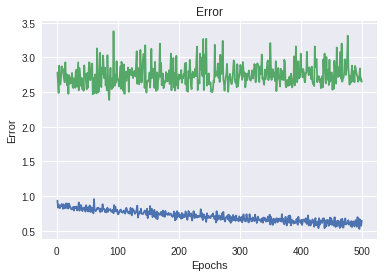

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
def history_vis(m):
  history_dict = m.history
  loss = history_dict.history['loss']
  error = history_dict.history['mean_absolute_error']
  val_loss = history_dict.history['val_loss']
  val_error = history_dict.history['val_mean_absolute_error']
  
  plt.figure()
  #plt.subplot(1,2,1)
  plt.plot(range(1, EPOCHS + 1), error, label = 'Training Error')
  plt.plot(range(1, EPOCHS + 1), val_error, label = 'Validation Error')
  plt.title('Error')
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  
#  plt.subplot(1,2,2)
  
  #plt.plot(range(1,EPOCHS + 1), loss, color = 'g', label = 'Training Error')
  #plt.plot(range(1,EPOCHS + 1), val_loss, marker = 'o', label = 'Validation Error', color = 'g')
  #plt.title('Loss')
  #plt.xlabel('Epochs')
  #plt.ylabel('Loss')
  

history_vis(model) 

In [48]:
build_model()
# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop])

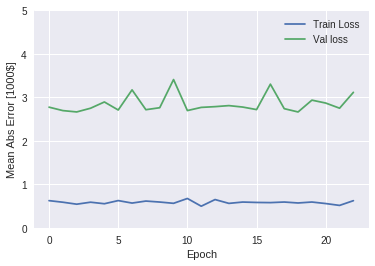

In [49]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)